In [9]:
import pandas as pd
import os
import sys
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [6]:
# ------------------ Load File ------------------
file = "ML374_S7_Concept_Weather_Cleaned_Data.xlsx"

df = pd.read_excel(file)

# ------------------ Required Columns ------------------
reqcol = ['global_radiation', 'humidity', 'pressure', 'cloud_cover', 'temperature']

for col in reqcol:
    if col not in df.columns:
        print(f"Missing required column: {col}")
        sys.exit()

df[reqcol] = df[reqcol].fillna(df[reqcol].mean())


In [7]:
# ------------------ Model Training ------------------
X = df[['global_radiation', 'humidity', 'pressure', 'cloud_cover']]
y = df['temperature']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=200)

model = LinearRegression()
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)

# ------------------ Residuals ------------------
residuals = ytest - ypred


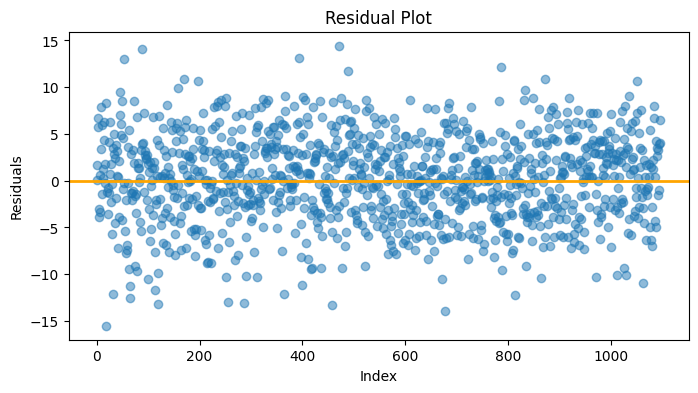

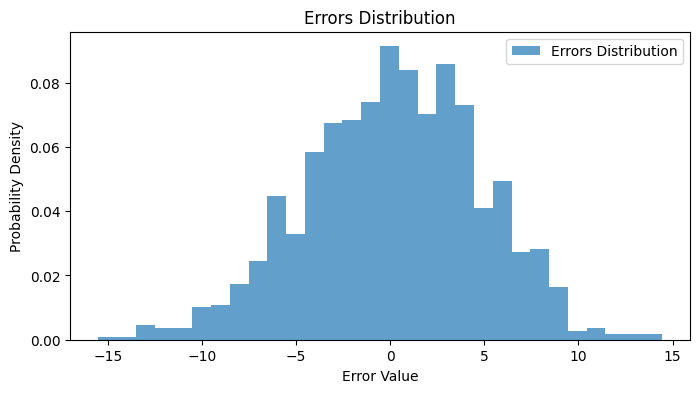

In [10]:
# ------------------ Plots ------------------

# Plot 1: Residuals vs Index (Scatter)
plt.figure(figsize=(8,4))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(y=0, color='orange', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.show()

# Plot 2: Histogram of Residuals
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=30, density=True, alpha=0.7, label='Errors Distribution')
plt.title("Errors Distribution")
plt.xlabel("Error Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()